In [2]:
OFFSET = 3000
SKIP_SIZE = 28
TARGET_CHANNEL = 15

## Running your solution for every experiment

Баш у меня не работает, потому что (внезапно) я на Винде!

Вместо этого запускаю predict.sh, которая использует всегда current_solution.py

In [20]:
%%cmd
for i in {0..9}; do
    python interactive_runner.py "train-online.h5" "experiment_$i" \
           "./baseline_solution.py" "python" "predictions/$i.txt"
done

Microsoft Windows [Version 10.0.10586]
(c) Љ®аЇ®а жЁп Њ ©Єа®б®дв (Microsoft Corporation), 2015. ‚бҐ Їа ў  § йЁйҐ­л.

C:\Users\David\YandexDisk\Competition\neurohack_2016\neurohack-2016-starterkit-master\task_1>mkdir -p ololo

C:\Users\David\YandexDisk\Competition\neurohack_2016\neurohack-2016-starterkit-master\task_1>for i in {0..9}; do

C:\Users\David\YandexDisk\Competition\neurohack_2016\neurohack-2016-starterkit-master\task_1>    python interactive_runner.py "train-online.h5" "experiment_$i" \

C:\Users\David\YandexDisk\Competition\neurohack_2016\neurohack-2016-starterkit-master\task_1>           "./baseline_solution.py" "python" "predictions/$i.txt"

C:\Users\David\YandexDisk\Competition\neurohack_2016\neurohack-2016-starterkit-master\task_1>done

C:\Users\David\YandexDisk\Competition\neurohack_2016\neurohack-2016-starterkit-master\task_1>

Џ®¤Ї ЇЄ  Ё«Ё д ©« -p г¦Ґ бгйҐбвўгҐв.
ЋиЁЎЄ  ў® ўаҐ¬п ®Ўа Ў®вЄЁ: -p.
Traceback (most recent call last):
  File "interactive_runner.py", line 50, in <module>
    interact(test_file=sys.argv[1], experiment_id=sys.argv[2], solution_file=sys.argv[3], runner=sys.argv[4], out_file=sys.argv[5])
IndexError: list index out of range
"done" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [1]:
%%bash
mkdir -p predictions
for i in {0..9}; do
    python interactive_runner.py "train-online.h5" "experiment_$i" \
           "./baseline_solution.py" "python" "predictions/$i.txt"
done

Couldn't find program: 'bash'


## Read dataset

In [8]:
import h5py
import numpy as np

%matplotlib inline
import seaborn as sns

In [9]:
def read_prediction(filename):
    with open(filename, 'r') as fin:
        return np.array([float(line) for line in fin])

In [10]:
with h5py.File('train-online.h5') as train_file:
    data = {experiment_id: np.array(experiment_data) 
                for experiment_id, experiment_data in train_file.items()}

## Plot target channel vs prediction

Первый бейзлайн выдаёт среднюю MSE, равную 1.179

Второй бейзлайн выдаёт среднюю MSE, равную 0.6337 (m=2, отработало на сервере за 10 секунд, у меня за 1 минуту 20 секунд - в 8 раз дольше)

m = 4  => 0.5808

m = 8 => 0.5267

m = 16 => 0.48, но отрабатывало на моей машине минут 7. Уже почти впритык. Впрочем, на их машине вышло 33 секунды. 


Авторегрессия: длина 30 -> 0.47, длина 100 и 300 - около 44

Усреднил авторегрессию и m16: 43.4

ПРЕДОБУЧЕННЫЙ RIDGE дал 37.4 (37.2 в смеси с другими методами)

0.35, если взять длинный и широкий предобученные риджи 7:3. 3:7 дают 34.6

Если добавить по 10% онлайн-обучения, получается только хуже - 35.3

sklearn.Ridge безбожно медленный

Linear_model тупит и не оборачивается.


In [618]:
mses = []
for i, (experiment_id, experiment_data) in enumerate(sorted(data.items())):
    target = experiment_data[OFFSET + SKIP_SIZE - 1:, TARGET_CHANNEL]
    prediction = read_prediction('predictions/{}.txt'.format(i))
    mses.append(np.mean((target-prediction)**2))
    #print(mses[-1])
print(np.mean(mses))

0.353456022611


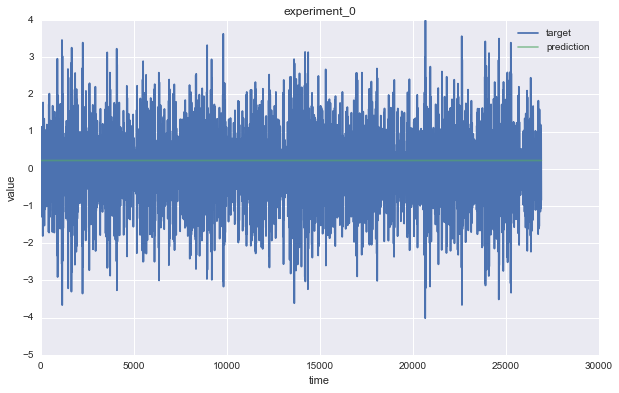

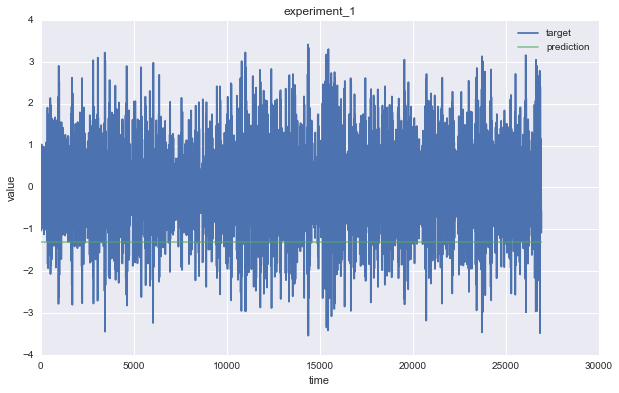

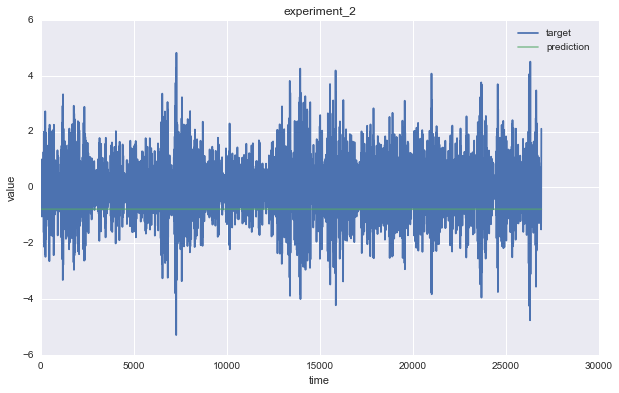

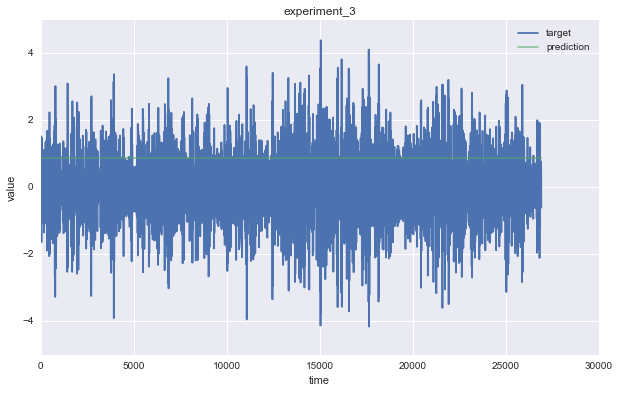

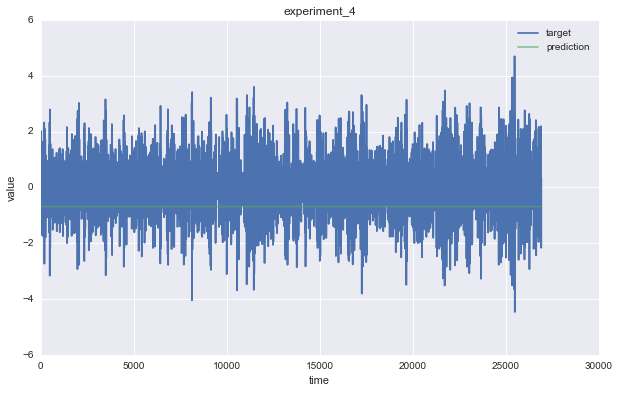

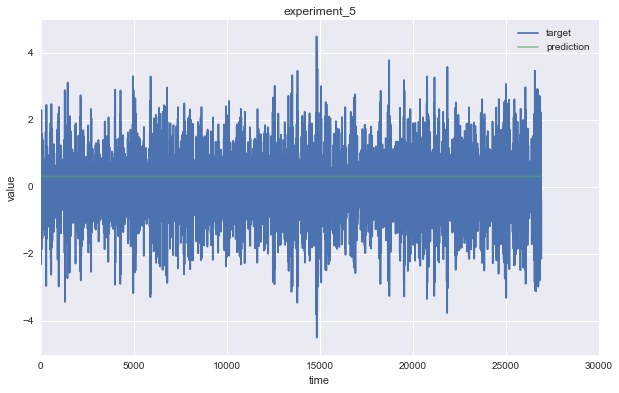

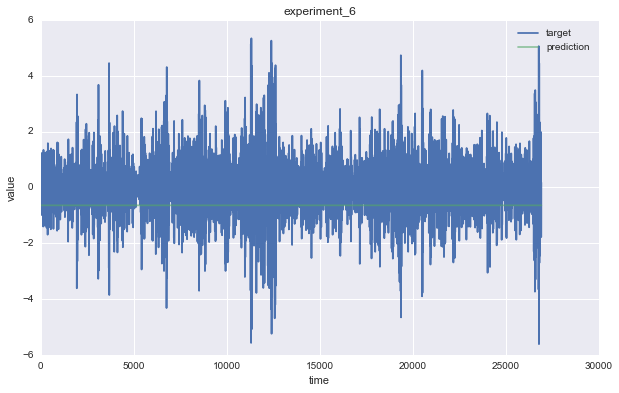

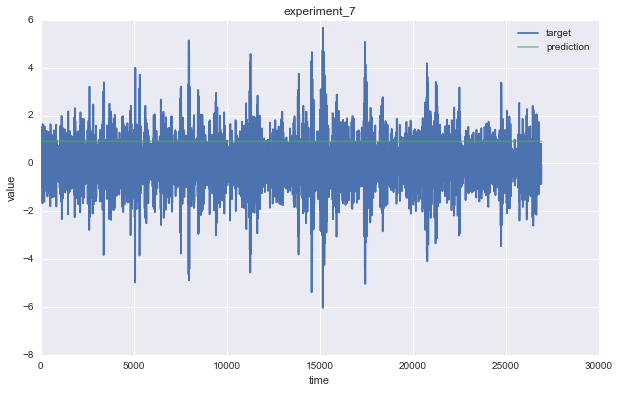

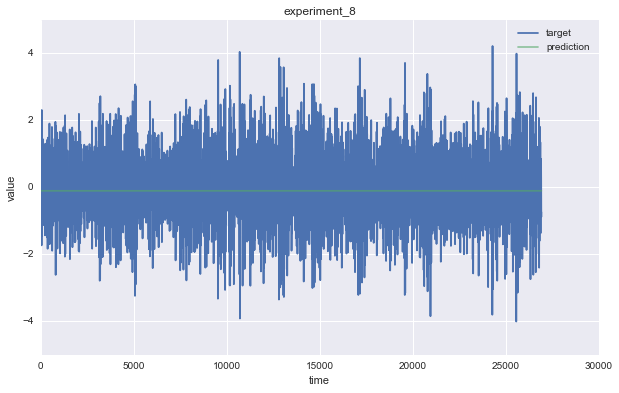

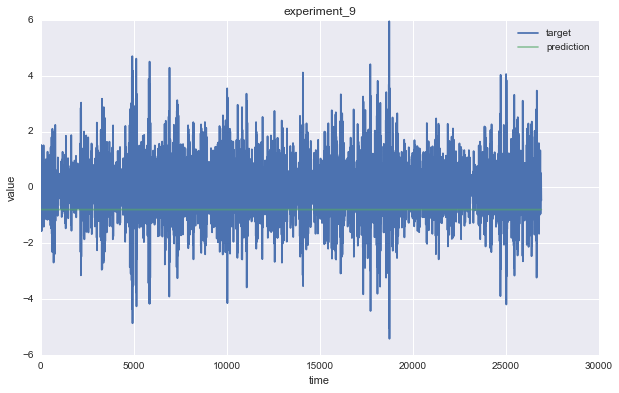

In [24]:
for i, (experiment_id, experiment_data) in enumerate(sorted(data.items())):
    target = experiment_data[OFFSET + SKIP_SIZE - 1:, TARGET_CHANNEL]
    prediction = read_prediction('predictions/{}.txt'.format(i))
    
    sns.plt.figure(figsize=(10, 6))
    sns.plt.plot(target)
    sns.plt.plot(prediction, alpha=0.6)
    sns.plt.legend(['target', 'prediction'])
    sns.plt.title(experiment_id)
    sns.plt.xlabel('time')
    sns.plt.ylabel('value')

In [26]:
np.array([[1,2],[3,4]]).flatten()

array([1, 2, 3, 4])

In [29]:
data['experiment_0'].shape

(29944, 21)

In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [66]:
y = data['experiment_8'][:,TARGET_CHANNEL]

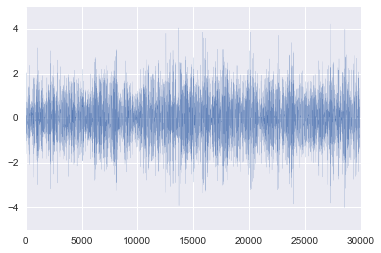

In [67]:
plot(y, lw = 0.1)

А частота-то меняется: пик раз в 20-30 измерений

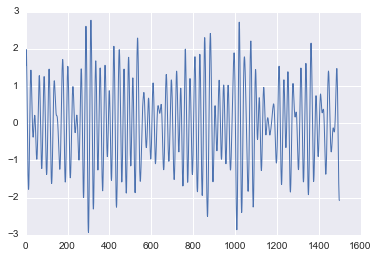

In [68]:
t, d = 14000, 1500
plot(y[t:t+d], lw = 1)

In [69]:
ay = abs(y)

средний модуль колеблется от 0.5 до 1, максимальный от 2 до 4

колебания кажутся периодичными, но они чересчур долговременные, надо пускать тренд разве что

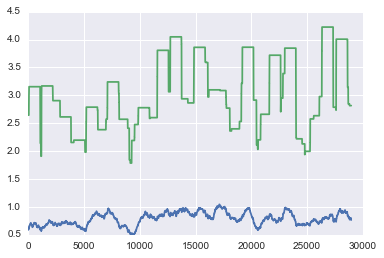

In [70]:
bw = 1000
#may = [mean(ay[i:(i+bw)]) for i in range(len(y)-bw)]
plot([mean(ay[i:(i+bw)]) for i in range(len(y)-bw)])
plot([max(ay[i:(i+bw)]) for i in range(len(y)-bw)])

Кстати, как у нас там работает экспоненциальное сглаживание??

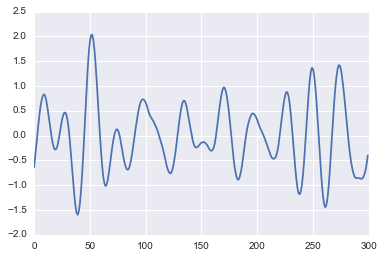

In [75]:
y1 = y[0:300]
plot(y1)

y = a sin bx
dy = ab cos bx
b = mean(abs(dy))/mean(y)

y = sin(a+x)

0.63862065662379186

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,  0])

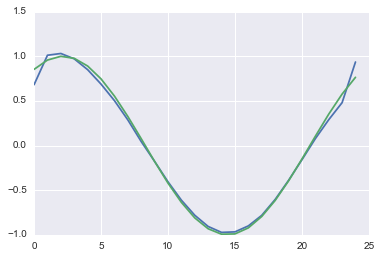

In [184]:
period  = 2 * pi / freq
period, ceil(period)

ps = np.zeros(int(ceil(period)))
ws = np.zeros(int(ceil(period)))
wh = np.floor(arange(-T+1,1) % period).astype(int)
for i, place in enumerate(wh):
    ps[place]+=y1[i]*w[i]/ampl
    ws[place]+=w[i]
mn = ps/ws
plot(mn)
plot(sin((arange(period)+4)*freq))

In [180]:
argmin(mn)

14

In [181]:
argmin(sin(arange(period)*freq))

18

In [182]:
period*0.75

18.44759772377197

[1.4091748490878728, 0.21287491139802778, 22.136892268970069]


30.0

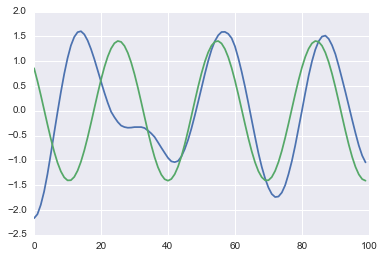

In [189]:
T = 100
st = 18600
y1 = y[st:(st+T)]
lam = 0.99

w = np.logspace(lam**T, 1, num = T)
ampl = mean(abs(y1)*w) / 0.64 / mean(w)
diff = y1[1:] - y1[:-1]
freq = mean(abs(diff*w[1:])) / (ampl*0.64)/mean(w)


period  = 2 * pi / freq
period, ceil(period)

ps = np.zeros(int(ceil(period)))
ws = np.zeros(int(ceil(period)))
wh = np.floor(arange(-T+1,1) % period).astype(int)
for i, place in enumerate(wh):
    ps[place]+=y1[i]*w[i]
    ws[place]+=w[i]
mn = ps/ws

phase = -argmin(mn)+period*0.75




print([ampl, freq, phase])
plot(y1)
plot(predict_sinusoid([ampl, freq, phase]))

ps = np.arange(ceil(period))
period  = 2 * pi / freq
ceil(period)

0.3660323412732292
[2.3699556355241107, 0.2546140345918389, 18.507970261493728]


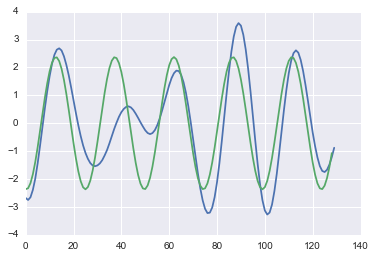

In [232]:
T = 100
st = 16000
y1 = y[st:(st+T)]
lam = 0.99
print(lam**T)
def predict_sinusoid(param):
    t = arange(-T+1, 1)
    p = param[0] * np.sin(param[1]*(t+param[2]))
    return p
def predict_forward(param, t = 28):
    return param[0] * np.sin(param[1]*(t+param[2]))
def estimate_sinusoid(y1):
    w = np.logspace(lam**T, 1, num = T)
    ampl = mean(abs(y1)*w) / 0.64 / mean(w)
    diff = y1[1:] - y1[:-1]
    freq = mean(abs(diff*w[1:])) / (ampl*0.64)/mean(w)
    
    period  = 2 * pi / freq

    ps = np.zeros(int(ceil(period)))
    ws = np.zeros(int(ceil(period)))
    wh = np.floor(arange(-T+1,1) % period).astype(int)
    for i, place in enumerate(wh):
        ps[place]+=y1[i]*w[i]
        ws[place]+=w[i]
    mn = ps/ws

    phase = -argmin(mn)+period*0.75
    
    return [ampl, freq, phase]

params = estimate_sinusoid(y1)
print(params)
#plot(predict_sinusoid(params))
#plot(y1)
plot(y[st:(st+T+30)])
plot(predict_forward(params, t = range(-T+1, 30)))

In [233]:
T = 200
lam = 0.9
mean([(y[st+T+28]-predict_forward(estimate_sinusoid(y[st:(st+T)]),28))**2 
      for st in arange(20000, step = 30)])

1.5682572836774973

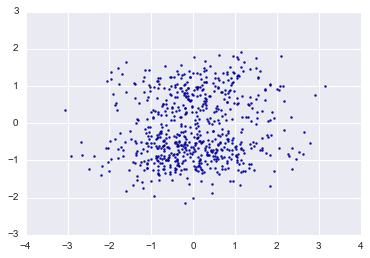

In [238]:
x1 = []
x2 = []
for st in arange(20000, step = 30):
    x1.append(y[st+T+28])
    x2.append(predict_forward(estimate_sinusoid(y[st:(st+T)]),28))
scatter(x1,x2, s = 4)

X

2.6561398887587544e-05
[0.76520319756540434, 0.28365869627632889, -5.3871161284825568]


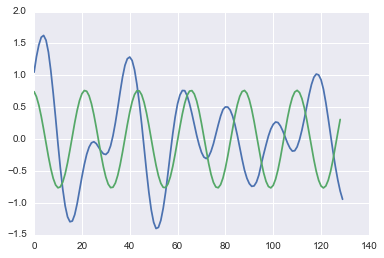

In [256]:
T = 100
st = 1200
y1 = y[st:(st+T)]
lam = 0.9
print(lam**T)
#plot(y1)
#plot(predict_sinusoid(estimate_sinusoid(y1)))
#plot(y1)
params = estimate_sinusoid(y1)
print(params)
plot(y[st:(st+T+30)])
plot(predict_forward(params, t = range(-T+1, 30)))

Я молодец, я классно научился подгонять синусы, да только передо мною не синус, а сумма колебаний

Всё тлен, нужно учить нейросети

In [466]:
from sklearn.neural_network import MLPRegressor

M = 100
SH = 28
starts = arange(25000,step = 4)
X = array([y[i:(i+M)] for i in starts])
Y = array([y[i+M+SH] for i in starts])

from sklearn.model_selection import train_test_split
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size = 0.5, random_state = 42)

Нейросетка даёт ошибку 0.55, простая линейная регрессия - 0.49, регуляризация не помогает

In [335]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LassoCV, Ridge

In [472]:
m = MLPRegressor(activation='relu',  hidden_layer_sizes=(30,10), learning_rate_init = 0.001, alpha=0.01)
#m = Ridge(alpha = 3)

print(mean([mean((m.fit(X_tr, Y_tr).predict(X_ts)-Y_ts)**2)  for i in range(5)]))

0.655253891112


In [ ]:
m = MLPRegressor(activation='relu',  hidden_layer_sizes=(3), learning_rate_init = 0.01, alpha=0.01)
m = Ridge(alpha = 3)

print(mean([mean((m.fit(X_tr, Y_tr).predict(X_ts)-Y_ts)**2)  for i in range(5)]))

Чтобы предсказывать риджом по одному ряду, нужно 300 прошлых точек

(0.39449667198784394, 300)

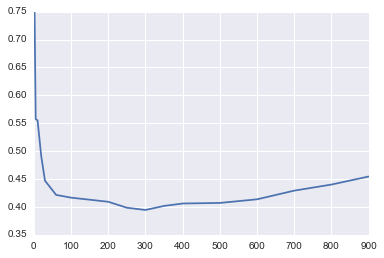

In [460]:
M = 20
SH = 28
starts = arange(25000,step = 4)
Ms = [2,5,10,20,30,60,100,200,250,300,350,400,500,600,700,800,900]
errs = []

for M in Ms:
    X = array([y[i:(i+M)] for i in starts])
    Y = array([y[i+M+SH] for i in starts])
    X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size = 0.5, random_state = 42)
    errs.append(mean((Ridge(alpha=0.01).fit(X_tr, Y_tr).predict(X_ts)-Y_ts)**2))
plot(Ms,errs) #, xscale('log')
min(errs), Ms[argmin(errs)]

[0.92827730543439768, 0.96238191265619955, 0.98276628474243544, 0.95514495997846693, 0.93028040210260432, 0.86882723460414812, 0.98185482046158401, 0.96829167089593826, 0.8641438365044497, 0.82307133814615274, 0.69060805218626864, 0.91720675046768885, 0.59941853787496469, 0.61210461617034473, 0.96412237624960806, 0.4907111184945453, 0.60995499655161267, 0.8606084717295065, 0.88581527625096812, 0.59995414267160296, 0.57897605146813913]


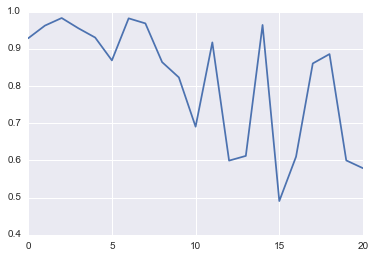

In [351]:
M = 20
SH = 28
starts = arange(25000,step = 4)

lr = LinearRegression()

helpers = []

for ch in range(21):
    predictor = e8[:,ch]
    target = e8[:,TARGET_CHANNEL]
    X = array([predictor[i:(i+M)] for i in starts])
    Y = array([target[i+M+SH] for i in starts])
    X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size = 0.5, random_state = 42)
    helpers.append(mean([mean((lr.fit(X_tr, Y_tr).predict(X_ts)-Y_ts)**2)  for i in range(5)]))
print(helpers)
plot(helpers)

Объединение всех каналов счастья не даёт с линейной регрессией, но даёт с Ridge (0.46)

Оптимальное качество достигается примерно при глубине, равной 65

65 0.40673827136


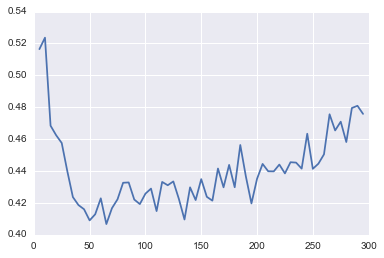

In [392]:
SH = 28
starts = arange(25000,step = 4)
err = []
lr = Ridge(alpha = 0.5)

target = e8[:,TARGET_CHANNEL]
ms = arange(5,300, step = 5)
for M in ms:
    X = array([e8[i:(i+M),:].flatten() for i in starts])
    Y = array([target[i+M+SH] for i in starts])
    X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size = 0.5, random_state = 42)
    err.append(mean([mean((lr.fit(X_tr, Y_tr).predict(X_ts)-Y_ts)**2)  for i in range(1)]))
plot(ms,err)
print(ms[argmin(err)], min(err))

Альфа, равная 1, примерно оптимальна

1 0.407215829793


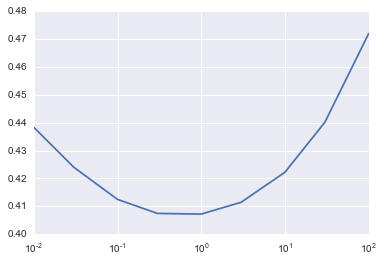

In [395]:
SH = 28
M = 65
starts = arange(25000,step = 4)
err = []

target = e8[:,TARGET_CHANNEL]
ms = arange(5,300, step = 5)
X = array([e8[i:(i+M),:].flatten() for i in starts])
Y = array([target[i+M+SH] for i in starts])
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size = 0.5, random_state = 42)

alphas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
for alpha in alphas:
    lr = Ridge(alpha = alpha)
    err.append(mean([mean((lr.fit(X_tr, Y_tr).predict(X_ts)-Y_ts)**2)  for i in range(1)]))
plot(alphas,err), xscale('log')
print(alphas[argmin(err)], min(err))

На разных экспериментах точность очень разная

0.497749234443


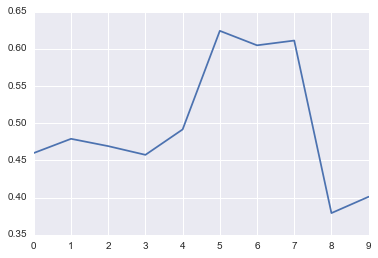

In [403]:
lr = Ridge(alpha = 1).fit(X_tr,Y_tr)
err = []
for i in range(10):
    another = data['experiment_'+str(i)]
    atarget = another[:,TARGET_CHANNEL]
    ms = arange(5,300, step = 5)
    X2 = array([another[i:(i+M),:].flatten() for i in starts])
    Y2 = array([atarget[i+M+SH] for i in starts])
    err.append(mean([mean((lr.predict(X2)-Y2)**2)  for i in range(1)]))
plot(err)
print(mean(err))

In [405]:
xp = []
yp = []
for i in range(10):
    another = data['experiment_'+str(i)]
    atarget = another[:,TARGET_CHANNEL]
    ms = arange(5,300, step = 5)
    xp = xp + [another[i:(i+M),:].flatten() for i in starts]
    yp = yp + [atarget[i+M+SH] for i in starts]
X = array(xp)
Y = array(yp)
X.shape, Y.shape

((62500, 1365), (62500,))

In [408]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size = 0.5, random_state = 42)
lr = Ridge(alpha= 1).fit(X_tr,Y_tr)
mean((lr.predict(X_ts)-Y_ts)**2)

0.36084888165428702

Обучившись на всех датасетах, я уменьшаю среднюю ошибку до 0.36

0.351572403111


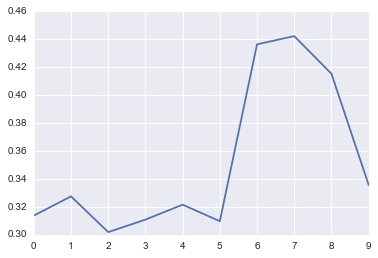

In [407]:
err = []
for i in range(10):
    another = data['experiment_'+str(i)]
    atarget = another[:,TARGET_CHANNEL]
    ms = arange(5,300, step = 5)
    X2 = array([another[i:(i+M),:].flatten() for i in starts])
    Y2 = array([atarget[i+M+SH] for i in starts])
    err.append(mean([mean((lr.predict(X2)-Y2)**2)  for i in range(1)]))
plot(err)
print(mean(err))

In [409]:
lr.intercept_

-0.0011314764226027373

In [411]:
lr.coef_.shape

(1365,)

In [413]:
print(lr.coef_.tolist())

[0.31652657391336914, -0.11331214078666056, -0.22828638897616402, -0.11326814012435339, 0.38783418068825704, -0.06733356712839139, -0.03788484676716095, 0.2377981980975767, 0.08926536303058749, -0.07251694015192743, 0.23894185316412278, 0.42899163955163105, -0.2103824986272829, 0.345815744236666, 0.15383095975450986, -0.5525704044479368, 0.2664070609421818, 0.018169435867321785, -0.040183283154506734, 0.11917690585191054, 0.2237345416833917, -0.21047547904786595, 0.04594125246169171, 0.18922350370785984, -0.17696803791099006, -0.18668429040346374, -0.10230709279092423, -0.1812280055084521, -0.2692368685274582, -0.1573319178384639, -0.07120510594672122, -0.3255219091811454, -0.278863283373336, -0.25367088303997487, -0.3539194876317602, -0.5322250539983064, -0.2354413280134891, -0.3445594271466774, -0.30691892968196477, -0.13592379735829865, -0.13208864457671435, -0.3800049242628901, 0.002249676801370315, -0.014523434346058002, 0.12998682553656113, 0.39093262810139484, -0.188197344500420

In [417]:
mean((dot(X_ts, lr.coef_)+lr.intercept_ - Y_ts)**2)

0.36084888165428702

#### Проделыва ту же штуку для одиночной регрессии

In [562]:
xp1 = []
yp1 = []
starts = arange(25000,step = 4)
M = 300
SH = 28
for i in range(10):
    another = data['experiment_'+str(i)]
    atarget = another[:,TARGET_CHANNEL]
    ms = arange(5,300, step = 5)
    xp1= xp1 + [another[i:(i+M),TARGET_CHANNEL].flatten() for i in starts]
    yp1 = yp1 + [atarget[i+M+SH] for i in starts]
X1 = array(xp1)
Y1 = array(yp1)
X1.shape, Y1.shape

((62500, 300), (62500,))

0.001 0.334921388009


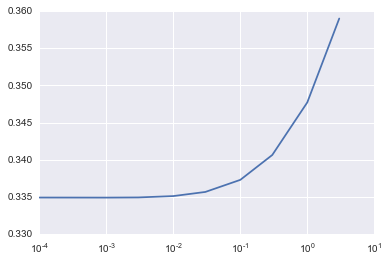

In [559]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X1, Y1, test_size = 0.5, random_state = 42)

alphas = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
err = []
for alpha in alphas:
    lr1 = Ridge(alpha = alpha)
    err.append(mean([mean((lr1.fit(X_tr, Y_tr).predict(X_ts)-Y_ts)**2)  for i in range(1)]))
plot(alphas,err), xscale('log')
print(alphas[argmin(err)], min(err))

In [563]:
lr1= Ridge(alpha = 0.001).fit(X_tr,Y_tr)
mean((lr1.fit(X_tr, Y_tr).predict(X_ts)-Y_ts)**2)

0.33492138800868837

0.330250698177


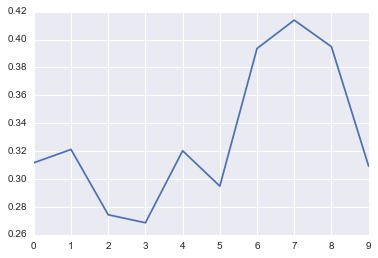

In [564]:
err = []
for i in range(10):
    another = data['experiment_'+str(i)]
    atarget = another[:,TARGET_CHANNEL]
    ms = arange(5,300, step = 5)
    X2 = array([another[i:(i+M),TARGET_CHANNEL].flatten() for i in starts])
    Y2 = array([atarget[i+M+SH] for i in starts])
    err.append(mean([mean((lr1.predict(X2)-Y2)**2)  for i in range(1)]))
plot(err)
print(mean(err))

индивидуальные регрессии для каждого эксперимента не очень полезны

0.330250698177 0.337948175821


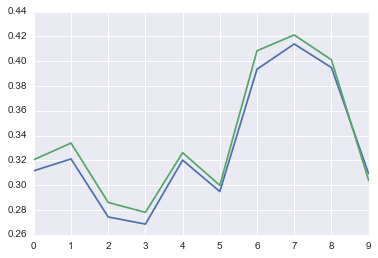

In [566]:
err = []
err2 = []
for i in range(10):
    another = data['experiment_'+str(i)]
    atarget = another[:,TARGET_CHANNEL]
    ms = arange(5,300, step = 5)
    X2 = array([another[i:(i+M),TARGET_CHANNEL].flatten() for i in starts])
    Y2 = array([atarget[i+M+SH] for i in starts])
    err.append(mean([mean((lr1.predict(X2)-Y2)**2)  for i in range(1)]))
    
    X2_tr, X2_ts, Y2_tr, Y2_ts = train_test_split(X2, Y2, test_size = 0.5, random_state = 42)
    lr2= Ridge(alpha = 0.001).fit(X2_tr,Y2_tr)
    err2.append(mean([mean((lr2.predict(X2_ts)-Y2_ts)**2)  for i in range(1)]))
plot(err)
plot(err2)
print(mean(err), mean(err2))

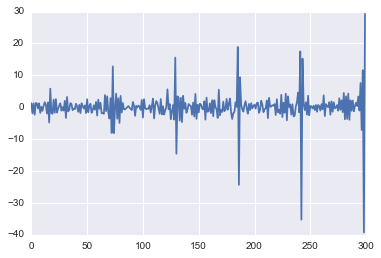

In [489]:
plot(lr1.coef_)

In [567]:
lr1.intercept_

-0.0035670228477590413

In [491]:
print(lr1.coef_.tolist())

[1.2571575278505256, -1.9322238861577798, 1.2351240123833869, -2.3395153947265093, 1.355123438922019, 1.1709744345947317, -0.3787976483079747, 1.2207309570751546, -1.7668754690386719, 0.16062708229768446, -1.1264264123855843, 0.38948275307617064, 1.5937447788842865, 0.8695771098284922, -1.966084282941292, 1.5605368758521672, -4.772377341608284, 5.841476905890357, -1.848593678623143, -2.0362814352462086, 2.396565498618738, -1.7190135734502225, 2.5615488953501604, -1.6495975663941498, -0.4390220638454143, 0.48961027644426597, 1.2240451362934697, -1.0675850618432523, 0.03392946820548473, -1.029174977125008, 2.036862909411884, -3.3729080236073186, 3.244463669651694, -1.3092328544012495, -0.816838613274528, 1.2899142185428656, 1.0025569149526499, -0.9060790072466315, -0.37491327480813935, -0.6135214935888884, 1.0968038978982597, 0.2846692104484729, -1.4419968651341675, 0.772383418313982, -1.849484439491888, 1.252094431614536, 0.2964653033146513, -0.34144600032919564, 0.5954313985257692, -1.

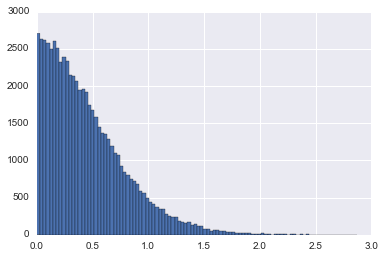

In [571]:
err = abs(lr1.predict(X1)-Y1)
_ = hist(err, bins = 100)

In [585]:
bad_data = (err>0.3)
mean(bad_data)

0.58211199999999996

Регрессия на плохих плохо отрабатывает

In [587]:
xtr.shape

(18191, 300)

In [589]:
print(mean(err[bad_data]**2))
X11, Y11 = X1[bad_data,:], Y1[bad_data]
xtr, xts, ytr, yts = train_test_split(X11, Y11, test_size = 0.5, random_state = 42)
lr12 = Ridge(alpha = 0.1).fit(xtr,ytr)
print(mean((lr12.predict(xts)-yts)**2))

0.546862523991
0.558055233505


### Хакерская схема: кластеризация + регрессия

In [516]:
percentile(dist, [25, 75])

array([ 22.,  27.])

In [521]:
for i in range(10):
    y2 = data['experiment_'+str(i)][:,TARGET_CHANNEL]
    is_maximum = (y2[1:-1]>y2[0:-2])&(y2[1:-1]>y2[2:])
    where_max = np.where(is_maximum)[0]
    dist = where_max[1:] - where_max[:-1]
    print(percentile(dist, [25, 50, 75]).astype(int), mean(abs(y2)))

[21 24 27] 0.783761775998
[22 24 27] 0.791390124261
[21 24 26] 0.76708822129
[22 24 26] 0.780603794379
[21 25 28] 0.785359826227
[21 23 25] 0.788901550189
[21 24 27] 0.742431352402
[21 23 26] 0.754325441752
[21 23 25] 0.786398719781
[21 23 25] 0.756908931858


In [531]:
y = data['experiment_8'][:,TARGET_CHANNEL]
y = data['experiment_5'][:,TARGET_CHANNEL]

y = np.concatenate([data['experiment_'+str(i)][:,TARGET_CHANNEL] for i in range(9)])
y.shape

(269496,)

In [532]:
is_maximum = (y[1:-1]>y[0:-2])&(y[1:-1]>y[2:])
where_max = np.where(is_maximum)[0]

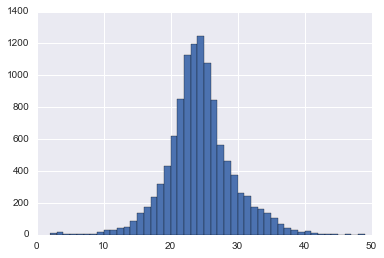

In [533]:
dist = where_max[1:] - where_max[:-1]
_ = hist(dist, bins = len(unique(dist)))

В качестве характеристики ряда хочу использовать медианное расстояние между пиками.

Буду брать скользящее окно ширины 300 -туда влезет где-то 15 пиков

Частота колеблется в основном в окне 22-24, но иногда вылезает и вверх, и вниз.

In [534]:
len(dist)

11270

In [535]:
bw = 10
med = [median(dist[i:(i+bw)]) for i in range(len(dist)-bw)]

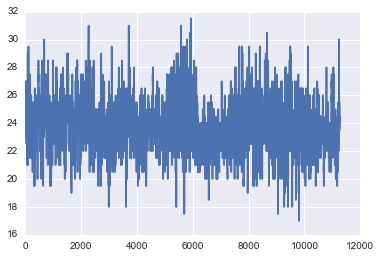

In [536]:
plot(med)

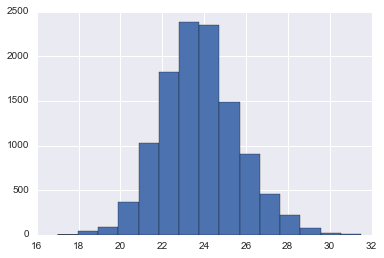

In [537]:
_ = hist(med, bins = int(max(med)-min(med)+1))

In [602]:
small = (array(med)<23)
large = (array(med)>25)
medium = (array(med)>=22)&(array(med)<=24)
mean(small), mean(large)

(0.26550000000000001, 0.17999999999999999)

In [629]:
len(y)

269496

In [642]:
M = 300
starts = np.random.choice(len(y)-M-28,100000)
X = array([y[i:(i+M)] for i in starts])
Y = array([y[i+M+28] for i in starts])
X.shape, Y.shape

((100000, 300), (100000,))

In [643]:
med = []
for x in X:
    is_maximum = (x[1:-1]>x[0:-2])&(x[1:-1]>x[2:])
    where_max = np.where(is_maximum)[0]
    dist = where_max[1:] - where_max[:-1]
    med.append(median(dist))
med = array(med)
small = (array(med)<23)
large = (array(med)>25)
medium = (array(med)>=22)&(array(med)<=24)
mean(small), mean(large)

(0.26339000000000001, 0.18146999999999999)

In [644]:
xs, ys = X[small], Y[small]
xm, ym = X[medium], Y[medium]
xl, yl = X[large], Y[large]

Индивидуальные модели не очень помогают: на каждой из выборок общая модель точнее.

In [648]:
errs = []
models = []
xtr, xts, ytr, yts = dict(), dict(), dict(), dict()
xtr[1], xts[1], ytr[1], yts[1] = train_test_split(xs, ys, test_size = 0.5, random_state = 42)
xtr[2], xts[2], ytr[2], yts[2] = train_test_split(xm, ym, test_size = 0.5, random_state = 42)
xtr[3], xts[3], ytr[3], yts[3] = train_test_split(xl, yl, test_size = 0.5, random_state = 42)

xtr[4] = np.concatenate([xtr[1],xtr[2],xtr[3]])
ytr[4] = np.concatenate([ytr[1],ytr[2],ytr[3]])
xts[4] = np.concatenate([xts[1],xts[2],xts[3]])
yts[4] = np.concatenate([yts[1],yts[2],yts[3]])
model0 = Ridge(alpha = 0.001).fit(xtr[4],ytr[4])


mods = dict()
for i in range(1,4):
    mods[i]= Ridge(alpha = 0.001).fit(xtr[i],ytr[i])
    print(mean((mods[i].predict(xts[i])-yts[i])**2), mean((model0.predict(xts[i])-yts[i])**2))
    models.append(mods[i].coef_)

0.360374637449 0.351397461364
0.382902385408 0.376975643651
0.38349598093 0.37895543455


Даже усреднение трёх слабых моделей не даёт одну сильную

In [651]:
p_comm = 1/3*(mods[1].predict(xts[4])+mods[2].predict(xts[4])+mods[3].predict(xts[4]))
print(mean((p_comm-yts[4])**2), mean((model0.predict(xts[4])-yts[4])**2))

0.373533178644 0.370630005643


### А что если я просто ВЫБЕРУ НАИЛУЧШУЮ модель?

In [614]:
print([m.tolist() for m in models])

[[-0.00016099738762463366, 0.0014888451401677723, -0.0022461135154930863, 0.0021399749180968115, -0.001235976306659044, -0.002864604487601337, 0.004495858203010441, -0.0024305616025195147, 0.0026307162825872066, 0.00029787994032404706, -0.004059319113411494, 0.00044503189446157276, 0.0029853951643900186, -0.0007495676437164294, -0.0003291913952233059, -0.0009783585426332171, 0.0010943538764947556, -0.0007888311075404926, 0.0007900510435217598, 0.0011011847166650136, -0.00200614055386691, 0.0011264571844567253, -0.004147823756380797, 0.005511081866386722, -0.0018855019662670708, 0.0059105602826479515, -0.034467191648607516, 0.09411475239918302, 0.869634865901031, 0.0949823224473939, -0.04089021476006742, 0.01493938684408018, -0.00658974494106211, 0.007991577983626319, -0.009125707241428246, 0.005269266903843863, -0.001744502903446218, -0.0017853974243372769, 0.0024573152434004563, 0.0007892051734017379, -0.0009248011228771613, -0.0009043722593134814, -0.0004725737462396888, 0.0024240098

In [616]:
len([m.tolist() for m in models])

3